## 백테스팅
 * 과거 데이터로 트레이딩 시스템의 성능을 평가하는 것을 백테스팅이라한다.
 * 백테스팅을 도와주는 파이썬 오픈소스는 zipline이 있다.

In [39]:
import sys, os, pandas as pd
sys.path.insert(0,'F:/BitCoinDev/BitCoinDev_Pycharm/')


from autotrading.db.mongodb import mongodb_handler
mongodb = mongodb_handler.MongoDBHandler('local', 'coiner', 'price_info')
query = {
    "cointype" : "ADA",
    "Currency_Trade":"Bithumb",
    "year" : 2018,
    "month" : 7
}
result = mongodb.find_items(query)

result = list(result)


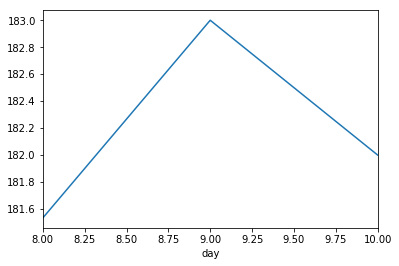

In [40]:
df = pd.DataFrame(result,columns=['timestamp','transaction_date','cointype', 'minute', 'second','price','amount','month','day','year'])

df['timestamp']=df['timestamp'].astype(int)
df['price']=df['price'].astype(float)
df['amount']=df['amount'].astype(float)

df[df.cointype=="ADA"].groupby('day').mean()['price'].plot()

### 1. zipline에서 데이터를 사용하기 위해 데이터프레임의 인덱스를 timestamp 칼럼 값으로 사용하겠다.

In [41]:
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df['timestamp'], unit='s')))
df

,timestamp,transaction_date,cointype,minute,second,price,amount,month,day,year
2018-07-08 09:16:42,1531041402,2018-07-08 18:16:42,ADA,16,42,182.0,10695.142800,7,8,2018
2018-07-08 09:15:52,1531041352,2018-07-08 18:15:52,ADA,15,52,182.0,225.447400,7,8,2018
2018-07-08 09:15:52,1531041352,2018-07-08 18:15:52,ADA,15,52,182.0,95.888000,7,8,2018
2018-07-08 09:18:38,1531041518,2018-07-08 18:18:38,ADA,18,38,181.0,102.000000,7,8,2018
2018-07-08 09:16:42,1531041402,2018-07-08 18:16:42,ADA,16,42,182.0,10695.142800,7,8,2018
2018-07-08 09:15:52,1531041352,2018-07-08 18:15:52,ADA,15,52,182.0,225.447400,7,8,2018
2018-07-08 09:28:11,1531042091,2018-07-08 18:28:11,ADA,28,11,182.0,12061.939560,7,8,2018
2018-07-08 09:27:54,1531042074,2018-07-08 18:27:54,ADA,27,54,181.0,21578.676800,7,8,2018
2018-07-08 09:27:54,1531042074,2018-07-08 18:27:54,ADA,27,54,181.0,2366.071800,7,8,2018
2018-07-08 10:32:12,1531045932,2018-07-08 19:32:12,ADA,32,12,181.0,911.722600,7,8,2018


### 2. 저장해둔 데이터는 거래 정보 데이터 이기 떄문에, 동시간에 발생한 거래가 여러 건일 경우 중복 데이터가 있을 수 있다. 따라서 데이터를 단순화하기 위해 1일치 중 마지막 값만 남기고 삭제한다.

In [44]:
df = df.drop_duplicates(subset='day', keep='last')
df

,timestamp,transaction_date,cointype,minute,second,price,amount,month,day,year
2018-07-08 10:32:12,1531045932,2018-07-08 19:32:12,ADA,32,12,181.0,911.7226,7,8,2018
2018-07-09 12:45:37,1531140337,2018-07-09 21:45:37,ADA,45,37,183.0,1639.3442,7,9,2018
2018-07-10 13:42:48,1531230168,2018-07-10 22:42:48,ADA,42,48,183.0,4540.3292,7,10,2018


### 3. index에서 date만 남깁니다.

In [47]:
df = df.set_index(pd.DatetimeIndex(df.index.date))
df

,timestamp,transaction_date,cointype,minute,second,price,amount,month,day,year
2018-07-08,1531045932,2018-07-08 19:32:12,ADA,32,12,181.0,911.7226,7,8,2018
2018-07-09,1531140337,2018-07-09 21:45:37,ADA,45,37,183.0,1639.3442,7,9,2018
2018-07-10,1531230168,2018-07-10 22:42:48,ADA,42,48,183.0,4540.3292,7,10,2018


### 4. zipline을 사용하기 위해 필요한 모듈을 임포트 하자.
앞에 생성한 데이터프레임을 data로 입력한 후 UTC 시간을 변경하고 price 필드만 선택해서 사용하자.
zipline은 크게 initialize와 handle_data로 테스트 할 수 있다. initialize는 거래를 시작하기 전 context에 필요한 데이터를 저장 할 수 있다. 저장된 context 정보는 handle_data에서 트레이딩에 사용 할 수 있다. handle_data에는 우리가 테스트하려는 알고리즘을 작성하면 된다.

In [55]:
import matplotlib.pyplot as plt
from zipline.api import order,symbol, record
from zipline.algorithm import TradingAlgorithm


data = df
data = data.tz_localize("UTC")
data = data[['price']]
data


def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('price'),1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)


result[['starting_cash','ending_cash','ending_value']]



,starting_cash,ending_cash,ending_value
2018-07-09 20:00:00+00:00,100000.0,100000.0000,0.0
2018-07-10 20:00:00+00:00,100000.0,99816.9075,183.0


자산은 portfolio_value로 확인 할 수 있다.

<function matplotlib.pyplot.show(*args, **kw)>

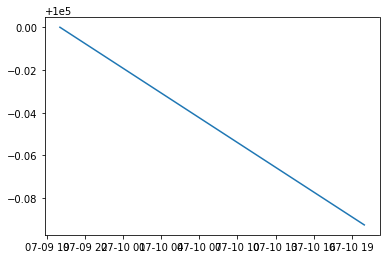

In [56]:
plt.plot(result.index, result.portfolio_value)
plt.show